Saving processed.cleveland.data.txt to processed.cleveland.data (2).txt


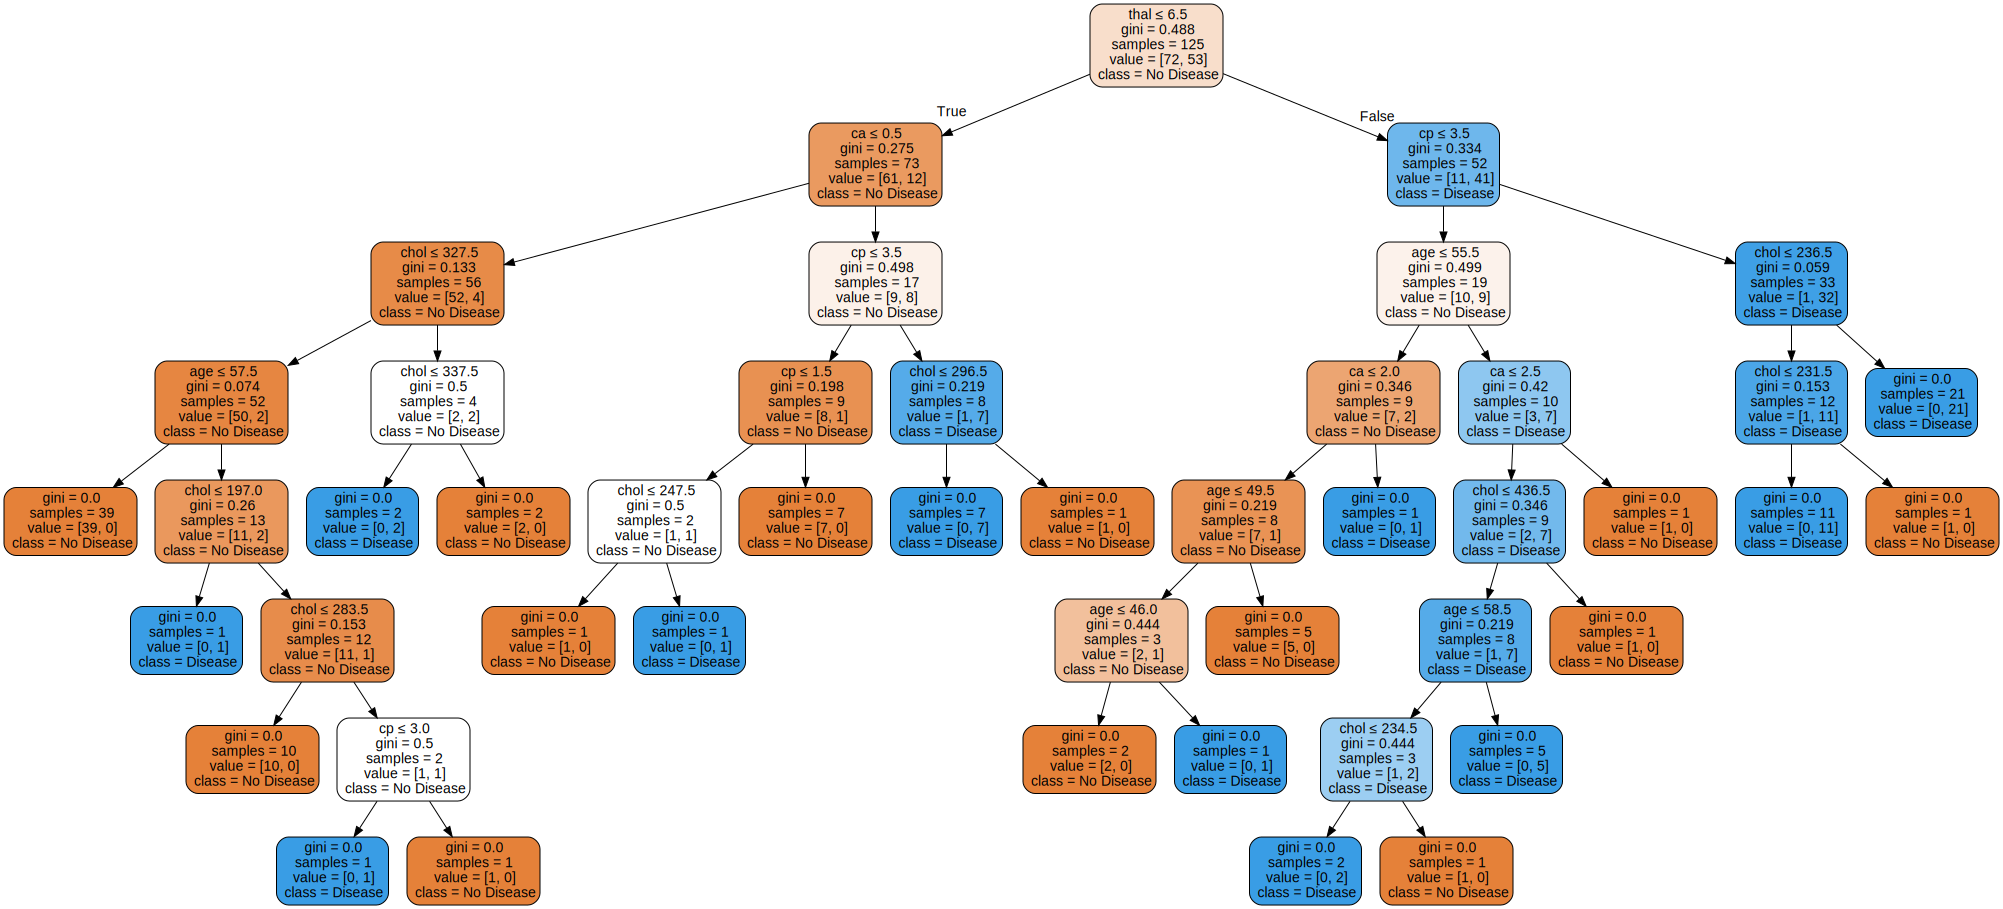

In [14]:
# Healthcare: Predicting Heart Disease
# Problem Statement: Develop a model to predict the likelihood of a patient having heart disease based on various medical attributes such as age, cholesterol levels, blood pressure, and ECG results.

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# Upload the txt file
uploaded = files.upload()

# Read the txt file into a pandas DataFrame
# Assuming the txt file is tab-delimited, change the delimiter if needed
data = pd.read_csv(next(iter(uploaded)), sep=',', names=columns)

# Preprocess dataset
data = data.replace('?', np.nan)
data = data.apply(pd.to_numeric)
data.fillna(data.median(), inplace=True)
data['target'] = data['target'].apply(lambda x: 1 if x > 0 else 0)

# Features and target
X = data.drop('target', axis=1)
y = data['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection
feature_importance = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
top_k_features = feature_importance.nlargest(5).index
X_reduced = X[top_k_features]
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier on reduced data
clf_reduced = DecisionTreeClassifier(random_state=42)
clf_reduced.fit(X_train_reduced, y_train)

# Visualize the smaller tree
dot_data = tree.export_graphviz(clf_reduced, out_file=None,
                                feature_names=X_reduced.columns,
                                class_names=['No Disease', 'Disease'],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

# (Optional) Pruning:
clf_pruned = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_leaf=10)
clf_pruned.fit(X_train, y_train)
# Visualize the pruned tree (similar to above, using 'clf_pruned')
# Train a Decision Tree Classifier on reduced data
clf_pruned = DecisionTreeClassifier(random_state=42)
clf_pruned.fit(X_train_reduced, y_train)

# Visualize the smaller tree
dot_data = tree.export_graphviz(clf_pruned, out_file=None,
                                feature_names=X_reduced.columns,
                                class_names=['No Disease', 'Disease'],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph
